In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [30]:
def getSlices3d(arr,orient,imgSize,count):
    # var
    lower = 150-imgSize
    mid1 = int(lower/2.0)
    mid2 = 150-int(lower/2.0)

    # current: 5 slices each 4mm/pixel apart
    # count = number of slices in each direction
    # skip how many slices - every other one
    skip = 4
    # travel
    travel = count * skip
    # always an odd number of slices around the center slice
    if orient == "A": 
        arr1 = arr[(60-travel):(60+travel+1):skip,0:imgSize,0:imgSize]
        arr2 = arr[(60-travel):(60+travel+1):skip,0:imgSize,lower:150]
        arr3 = arr[(60-travel):(60+travel+1):skip,lower:150,lower:150]
        arr4 = arr[(60-travel):(60+travel+1):skip,lower:150,0:imgSize]
        #
        arr5 = arr[(75-travel):(75+travel+1):skip,mid1:mid2,mid1:mid2]
        #
        arr6 = arr[(90-travel):(90+travel+1):skip,0:imgSize,0:imgSize]
        arr7 = arr[(90-travel):(90+travel+1):skip,0:imgSize,lower:150]
        arr8 = arr[(90-travel):(90+travel+1):skip,lower:150,lower:150]
        arr9 = arr[(90-travel):(90+travel+1):skip,lower:150,0:imgSize]
        
        return  [arr5.reshape(count*2+1,imgSize,imgSize,1)]

    elif orient == "C":
        arr1 = arr[0:imgSize,(60-travel):(60+travel+1):skip,0:imgSize]
        arr2 = arr[0:imgSize,(60-travel):(60+travel+1):skip,lower:150]
        arr3 = arr[lower:150,(60-travel):(60+travel+1):skip,lower:150]
        arr4 = arr[lower:150,(60-travel):(60+travel+1):skip,0:imgSize]
        #
        arr5 = arr[mid1:mid2,(75-travel):(75+travel+1):skip,mid1:mid2]
        #
        arr6 = arr[0:imgSize,(90-travel):(90+travel+1):skip,0:imgSize]
        arr7 = arr[0:imgSize,(90-travel):(90+travel+1):skip,lower:150]
        arr8 = arr[lower:150,(90-travel):(90+travel+1):skip,lower:150]
        arr9 = arr[lower:150,(90-travel):(90+travel+1):skip,0:imgSize]
        
        return [  np.swapaxes(np.flipud (arr5) ,0,1).reshape(count*2+1,imgSize,imgSize,1) ]

    elif orient == "S":
        arr1 = arr[0:imgSize,0:imgSize,(60-travel):(60+travel+1):skip]
        arr2 = arr[0:imgSize,lower:150,(60-travel):(60+travel+1):skip]
        arr3 = arr[lower:150,lower:150,(60-travel):(60+travel+1):skip]
        arr4 = arr[lower:150,0:imgSize,(60-travel):(60+travel+1):skip]
        #
        arr5 = arr[mid1:mid2,mid1:mid2,(75-travel):(75+travel+1):skip]
        #
        arr6 = arr[0:imgSize,0:imgSize,(90-travel):(90+travel+1):skip]
        arr7 = arr[0:imgSize,lower:150,(90-travel):(90+travel+1):skip]
        arr8 = arr[lower:150,lower:150,(90-travel):(90+travel+1):skip]
        arr9 = arr[lower:150,0:imgSize,(90-travel):(90+travel+1):skip]

        return [np.swapaxes( np.rot90(arr5,3) , 0,2).reshape(count*2+1,imgSize,imgSize,1)]


def getSlices2d(arr,orient,imgSize):
    lower = 150-imgSize
    mid1 = int(lower/2.0)
    mid2 = 150-int(lower/2.0)

    if orient == "A":
        arr1 = arr[60,0:imgSize,0:imgSize]
        arr2 = arr[60,0:imgSize,lower:150]
        arr3 = arr[60,lower:150,lower:150]
        arr4 = arr[60,lower:150,0:imgSize]
        #
        arr5 = arr[75, mid1:mid2 , mid1:mid2 ]
        #
        arr6 = arr[90,0:imgSize,0:imgSize]
        arr7 = arr[90,0:imgSize,lower:150]
        arr8 = arr[90,lower:150,lower:150]
        arr9 = arr[90,lower:150,0:imgSize]
        
        return  [arr5.reshape(imgSize,imgSize,1)]

    elif orient == "C":
        arr1 = arr[0:imgSize,60,0:imgSize]
        arr2 = arr[0:imgSize,60,lower:150]
        arr3 = arr[lower:150,60,lower:150]
        arr4 = arr[lower:150,60,0:imgSize]
        #
        arr5 = arr[mid1:mid2,75,mid1:mid2]
        #
        arr6 = arr[0:imgSize,90,0:imgSize]
        arr7 = arr[0:imgSize,90,lower:150]
        arr8 = arr[lower:150,90,lower:150]
        arr9 = arr[lower:150,90,0:imgSize]
        
        return  [ np.flipud (arr5).reshape(imgSize,imgSize,1)  ] # np.swapaxes( ,0,1)

    elif orient == "S":
        arr1 = arr[0:imgSize,0:imgSize,60]
        arr2 = arr[0:imgSize,lower:150,60]
        arr3 = arr[lower:150,lower:150,60]
        arr4 = arr[lower:150,0:imgSize,60]
        #
        arr5 = arr[mid1:mid2,mid1:mid2,75]
        #
        arr6 = arr[0:imgSize,0:imgSize,90]
        arr7 = arr[0:imgSize,lower:150,90]
        arr8 = arr[lower:150,lower:150,90]
        arr9 = arr[lower:150,0:imgSize,90]
        
        return [np.flipud (arr5).reshape(imgSize,imgSize,1) ]#  np.swapaxes( np.rot90(arr5,3) , 0,2).reshape(imgSize,imgSize,1)
        
#     return  [arr1.reshape(imgSize,imgSize,1) 
#             ,arr2.reshape(imgSize,imgSize,1) 
#             ,arr3.reshape(imgSize,imgSize,1) 
#             ,arr4.reshape(imgSize,imgSize,1) 
#             ,arr5.reshape(imgSize,imgSize,1)
#             ,arr6.reshape(imgSize,imgSize,1) 
#             ,arr7.reshape(imgSize,imgSize,1) 
#             ,arr8.reshape(imgSize,imgSize,1) 
#             ,arr9.reshape(imgSize,imgSize,1)]



def getXandY(imgSize,count, bool):

    _augmentationFactor = 1
    # if train, do nothing
    # if validate or test
    if (bool):
        _augmentationFactor = 1

    a = []
    s = []
    c = []
    y = []
    clincical = []
    
    sample = ["lung1_43062"] # ,,,'lung1_43402','lung1_43421' ,'lung1_43370','lung1_43392'
    
    for i in range (1):

        npy = '/home/ahmed/Dropbox/DFCI/kerasLungs/sample/' + sample[i] + '.npy'

        arr = np.load(npy)
        # X #

        a.extend (  getSlices2d(arr,'A',imgSize) ) # adds 9 images   
        s.extend (  getSlices2d(arr,'S',imgSize) ) # adds 9 images   
        c.extend (  getSlices2d(arr,'C',imgSize) ) # adds 9 images   


        # Y #
        y.extend ( [ int(1) for x in range (_augmentationFactor) ] )

        # now clinical
        clincicalVector = [ i , i , i ]
        clincical.extend( [clincicalVector for x in range(_augmentationFactor)] )


    # after loop
    a = np.array(a, 'float32')
    s = np.array(s, 'float32')
    c = np.array(c, 'float32')
    y = np.array(y, 'int8')
    y = np_utils.to_categorical(y, 2)
    clincical = np.array(clincical , 'float32'  )
    return a,s,c,y,clincical




In [31]:
x_train_a , x_train_s , x_train_c , y_train , clinical_train = getXandY(120,2,False)
print x_train_a.shape
print x_train_s.shape
print x_train_c.shape

(1, 120, 120, 1)
(1, 120, 120, 1)
(1, 120, 120, 1)


In [32]:
npy = '/home/ahmed/Dropbox/DFCI/kerasLungs/sample/' + "lung1_43062" + '.npy'
arr = np.load(npy)
arr.shape

(150, 150, 150)

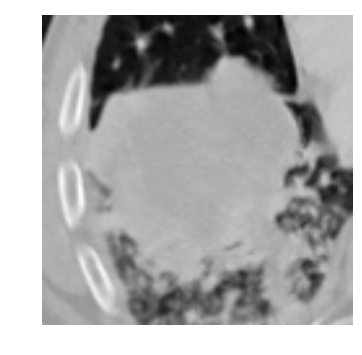

In [35]:
plt.imshow  ( x_train_a[0].reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

In [12]:
np.rot90(x_train_s[0]).shape

(120, 5, 120, 1)

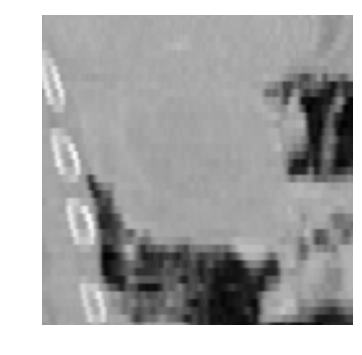

In [64]:
plt.imshow  ( arr[15:135,75,15:135 ] , cmap=plt.cm.Greys_r)
plt.axis('off');
plt.savefig("c.jpg")

In [652]:
def applyRotationToDepth(arr):
    #
    out_clockwise = np.copy(arr)
    out_anticlockwise = np.copy(arr)
    #
    # define rotations thetas in radians
    theta_clockwise = np.pi / 180 * (90)
    theta_anticlockwise = np.pi / 180 * (-90)
    #
    for i in range (arr.shape[0]):
        #
        out_clockwise[i] = random_rotation(out_clockwise[i],theta = theta_clockwise, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
        # 
        out_anticlockwise[i] = random_rotation(out_anticlockwise[i],theta = theta_anticlockwise, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
        
    return [ out_clockwise , out_anticlockwise ]

In [653]:
def applyRotation(arr,theta):
    #
    out = np.copy(arr)
    #
    for i in range (arr.shape[0]):
        out[i] = random_rotation(out_clockwise[i],theta = theta, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
    return  out

In [654]:
def applyIntToDepth(arr):
    #
    out = np.copy(arr)
    #

    #
    for i in range (arr.shape[0]):
    
        #
        out[i] = random_shear(out[i], 1000, row_axis=1, col_axis=2, channel_axis=0,
                 fill_mode='nearest', cval=0.)
        # 

    return  out

NameError: global name 'np_utils' is not defined

In [656]:
def applyRotation(arr,theta):
    #
    out = np.copy(arr)
    #
    for i in range (arr.shape[0]):
        out[i] = random_rotation(out[i],theta = theta, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
    return  out
    
import random




def myGenerator(batch_size,x_train_a,x_train_s,x_train_c):
    
    #
    x_train_a_aug = []
    x_train_s_aug = []
    x_train_c_aug = []
    #
    idx = np.random.permutation( x_train_a.shape[0])
    # get Y and clinical at same random idx



    # lets augment  # - x_train_a.shape[0]%batch_size
    for k in range ( x_train_a.shape[0] ): 
        #
        out_a = np.copy(x_train_a[k])
        out_s = np.copy(x_train_s[k])
        out_c = np.copy(x_train_c[k])
        # identify bools and values to be applied across all directions
        # flip
        flipBoolud = bool(random.getrandbits(1))
        flipBoolio = bool(random.getrandbits(1))
        flipBoolrl = bool(random.getrandbits(1))
        # rotation
        theta = np.pi / 180 * np.random.uniform(-180, 180)
        # do all operations, then add at the end
        #
        if flipBoolud:
            out_a =  np.fliplr(out_a) 
            out_s =  np.fliplr(out_s) 
            out_c =  np.fliplr(out_c)    
        if flipBoolio:
            out_a =  np.flipud(out_a) 
            out_s =  np.flipud(out_s) 
            out_c =  np.flipud(out_c) 
        if flipBoolrl:
            out_a =  out_a[:,:,::-1]
            out_s =  out_s[:,:,::-1]
            out_c =  out_c[:,:,::-1]
        #
        out_a = applyRotation(out_a,theta)
        out_s = applyRotation(out_s,theta)
        out_c = applyRotation(out_c,theta)

        # add to list
        x_train_a_aug.append(out_a)
        x_train_s_aug.append(out_s)
        x_train_c_aug.append(out_c)

    return x_train_a_aug , x_train_s_aug , x_train_c_aug
        

In [657]:
x_train_a , x_train_s , x_train_c  = getXandY()
x_train_a.shape

x_train_a_aug , x_train_s_aug , x_train_c_aug = myGenerator(4,x_train_a,x_train_s,x_train_c)

In [658]:
len(x_train_a_aug)

9

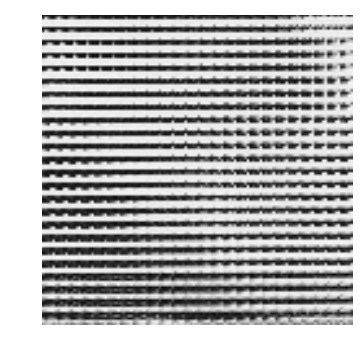

In [582]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, Convolution3D , MaxPooling3D
from sklearn.metrics import roc_auc_score

def make3dConvModel(imgSize,count):
    # (samples, conv_dim1, conv_dim2, conv_dim3, channels) if dim_ordering='tf'.

    model = Sequential()

    conv_filt = 3
    conv_filt_depth = 2

    # input = (samples, count*2+1,imgSize,imgSize,1 )
    model.add(Convolution3D(48, conv_filt_depth , conv_filt, conv_filt, border_mode='same',dim_ordering='tf' ,input_shape=[count*2+1,imgSize,imgSize,1]  , activation='relu')) # 32
    # output (samples, count*2+1,imgSize,imgSize, nb_filter)

    model.add( Convolution3D( 48, conv_filt_depth , conv_filt, conv_filt, border_mode='same' , activation='relu' , dim_ordering='tf'  ) ) # 32
    model.add( MaxPooling3D( pool_size=(2, 3, 3) , dim_ordering='tf'  ) )
    model.add( Dropout(0.5) )

    model.add(Convolution3D(96, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'   , dim_ordering='tf' )) # 64

    model.add(Convolution3D(96, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'  , dim_ordering='tf'  )) # 64
    model.add(MaxPooling3D(pool_size=(2, 3, 3) , dim_ordering='tf' ))
    model.add(Dropout(0.5))
    
    model.add(Convolution3D(192, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'  , dim_ordering='tf'  )) # 64   

    model.add(Flatten())
    model.add( Dense(512 , activation='relu' ) ) # 512
    model.add(Dropout(0.5))
    
    return model

In [651]:
def random_rotation(x, theta=90, row_axis=1, col_axis=2, channel_axis=0,
                    fill_mode='nearest', cval=0.):
    """Performs a random rotation of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        rg: Rotation range, in degrees.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Rotated Numpy image tensor.
    """
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(rotation_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_shift(x, wrg, hrg, row_axis=1, col_axis=2, channel_axis=0,
                 fill_mode='nearest', cval=0.):
    """Performs a random spatial shift of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        wrg: Width shift range, as a float fraction of the width.
        hrg: Height shift range, as a float fraction of the height.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Shifted Numpy image tensor.
    """
    h, w = x.shape[row_axis], x.shape[col_axis]
    tx = np.random.uniform(-hrg, hrg) * h
    ty = np.random.uniform(-wrg, wrg) * w
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])

    transform_matrix = translation_matrix  # no need to do offset
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_shear(x, intensity, row_axis=1, col_axis=2, channel_axis=0,
                 fill_mode='nearest', cval=0.):
    """Performs a random spatial shear of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        intensity: Transformation intensity.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Sheared Numpy image tensor.
    """
    shear = np.random.uniform(-intensity, intensity)
    shear_matrix = np.array([[1, -np.sin(shear), 0],
                             [0, np.cos(shear), 0],
                             [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(shear_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_zoom(x, zoom_range, row_axis=1, col_axis=2, channel_axis=0,
                fill_mode='nearest', cval=0.):
    """Performs a random spatial zoom of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        zoom_range: Tuple of floats; zoom range for width and height.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Zoomed Numpy image tensor.
    # Raises
        ValueError: if `zoom_range` isn't a tuple.
    """
    if len(zoom_range) != 2:
        raise ValueError('zoom_range should be a tuple or list of two floats. '
                         'Received arg: ', zoom_range)

    if zoom_range[0] == 1 and zoom_range[1] == 1:
        zx, zy = 1, 1
    else:
        zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    zoom_matrix = np.array([[zx, 0, 0],
                            [0, zy, 0],
                            [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(zoom_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_channel_shift(x, intensity, channel_axis=0):
    x = np.rollaxis(x, channel_axis, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_channel + np.random.uniform(-intensity, intensity), min_x, max_x)
                      for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x




def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
    return transform_matrix


def apply_transform(x, transform_matrix, channel_axis=0, fill_mode='nearest', cval=0.):
    x = np.rollaxis(x, channel_axis, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                                                         final_offset, order=0, mode=fill_mode, cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x

In [583]:
modo = make3dConvModel(108,2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution3d_92 (Convolution3D) (None, 5, 108, 108, 4 912         convolution3d_input_23[0][0]     
____________________________________________________________________________________________________
convolution3d_93 (Convolution3D) (None, 5, 108, 108, 4 41520       convolution3d_92[0][0]           
____________________________________________________________________________________________________
maxpooling3d_42 (MaxPooling3D)   (None, 2, 36, 36, 48) 0           convolution3d_93[0][0]           
____________________________________________________________________________________________________
dropout_61 (Dropout)             (None, 2, 36, 36, 48) 0           maxpooling3d_42[0][0]            
___________________________________________________________________________________________

In [533]:
convo1 = modo.layers[0]

In [544]:
convo1.output_shape


(None, 5, 120, 120, 64)

(9, 5, 120, 120, 1)

In [497]:
x_train_a[0][0].shape

(120, 120, 1)

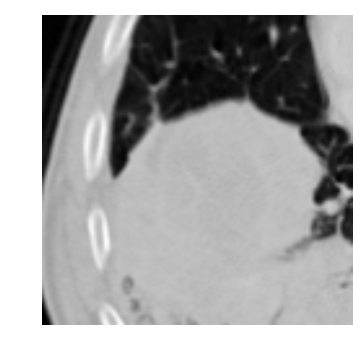

In [498]:
sikos = applyIntToDepth(x_train_a[0] )
sikos.shape
plt.imshow  (  sikos[0]  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

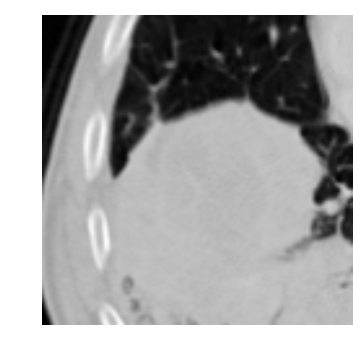

In [494]:
plt.imshow  (  x_train_a[0][0]  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

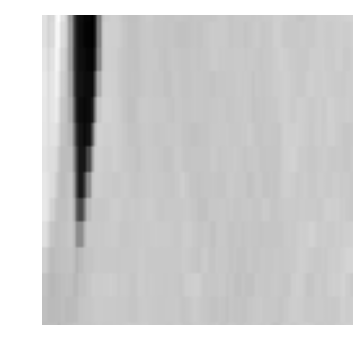

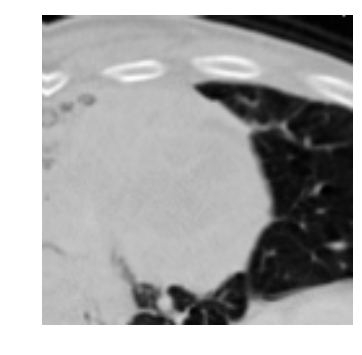

In [388]:
plt.imshow  (  sikos[0]  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

In [236]:
scipy.ndimage.interpolation.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)

NameError: name 'scipy' is not defined

In [154]:
def centerAndStandardizeTraining(arr):
    out = arr
    #
    mean = np.mean(out,axis=(0) )
    print mean.shape
    std = np.std(out,axis=(0) )
    print std.shape
    # 
    out -= mean
    out /= (std + np.finfo(float).eps )
    #
    return mean,std,out

In [155]:
cen = centerAndStandardizeTraining(x_train_a)

(120, 120, 1)
(120, 120, 1)


In [136]:
# flip all direction
def flipAllThreeDirections(arr):
    flip_ud = np.fliplr(arr) 
    flip_io = np.flipud(arr) 
    flip_rl = arr[:,:,::-1]
    return [flip_ud , flip_io , flip_rl]
    
# adds original, then adds augmented - changes structure (doesnt append at end)
def augmentTraining(arr_a,arr_s,arr_c):
    out_a = []
    out_s = []
    out_c = []
    # loop
    for k in range (arr_a.shape[0]):
        # Axial
        # append original
        out_a.append( arr_a[k] )
        # extend augemented
        out_a.extend(  flipAllThreeDirections(arr_a[k])  )
        
        # Sagittal
        # append original
        out_s.append( arr_s[k] )
        # extend augemented
        out_s.extend(  flipAllThreeDirections(arr_s[k])  )
        
        # Coronal
        # append original
        out_c.append( arr_c[k] )
        # extend augemented
        out_c.extend(  flipAllThreeDirections(arr_c[k])  )
        
        
    return np.array (out_a , 'float32' )  , np.array (out_s , 'float32' )  , np.array (out_c , 'float32' ) 

In [137]:
a , s , c  = augmentTraining( x_train_a , x_train_s , x_train_c  )

In [140]:
c.shape

(36, 5, 120, 120, 1)

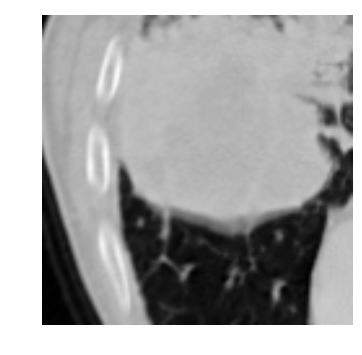

In [160]:
plt.imshow(np.flipud(x_train_a[0])  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

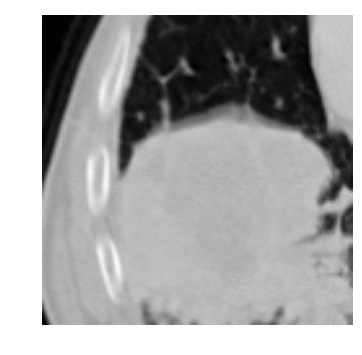

In [158]:
plt.imshow(np.fliplr(x_train_a[0])  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

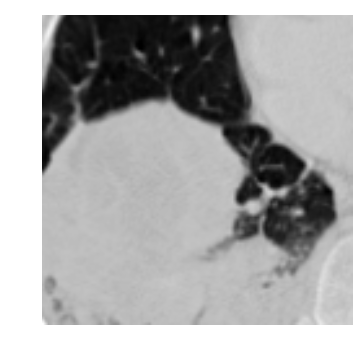

In [145]:
plt.imshow(a[4][0,:,:,:].reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');


In [33]:
#
#
#
#
#
# operate on each orientation seperately
def centerAndStandardize(arr):
    out = arr
    #
    mean = np.mean(out,axis=(0) )
    std = np.std(out,axis=(0) )
    # 
    out -= mean
    out /= (std + np.finfo(float).eps )
    
    return mean,std,out

In [34]:
mean,std,out = centerAndStandardize(x_train_a)

In [39]:
out[0,0,0,0,0]

-0.86683702

In [31]:
center.shape

(9, 5, 120, 120, 1)

In [26]:
np.std( [ x_train_a[k,0,0,0,0] for k in range(x_train_a.shape[0]) ])

471.06122

In [29]:
x_train_a[0,0,0,0,0]

-997.0

In [30]:
mean[0,0,0,0]

-588.66669

In [32]:
center[0,0,0,0,0]


-408.33331

In [5]:
print myData.shape

datagenTrain = ImageDataGenerator(
featurewise_center=True, 
featurewise_std_normalization=True,
samplewise_center=False,
samplewise_std_normalization=False) 

datagenTrain.fit(myData) 
print datagenTrain.mean
print datagenTrain.std

(9, 5, 120, 120, 1)


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (9, 5, 120, 120, 1)

In [103]:
datagenTrain.std


array([[[ 356.71228027]]], dtype=float32)

In [81]:
testa =  [ float(x_train_a[k,0,0]) for k in range (x_train_a.shape[0]) ]
print testa

[-1007.0, 23.0, 83.0, -973.0, -886.0, -1000.0, -88.0, 186.0, -1004.0]


In [82]:
mean = np.mean(testa)
print mean
std = np.std(testa)
final = (testa - mean) / std
final

-518.444444444


array([-0.94915645,  1.05190798,  1.16847484, -0.88310189, -0.71407995,
       -0.93555698,  0.83625929,  1.36858128, -0.9433281 ])

In [90]:
normArr = featurewiseCenterAndStd(x_train_a)
normArr.shape

[-145.6569519]
[[[-145.6569519]]]


(9, 120, 120, 1)

In [94]:
x_train_a - [-145.6569519]

array([[[[ 143.24228024],
         [ 143.26470732],
         [ 143.2871344 ],
         ..., 
         [ 146.58110553],
         [ 146.56989204],
         [ 146.51662778]],

        [[ 143.2310667 ],
         [ 143.2310667 ],
         [ 143.26751065],
         ..., 
         [ 146.54185825],
         [ 146.55307173],
         [ 146.54466158]],

        [[ 143.261904  ],
         [ 143.22265672],
         [ 143.2310667 ],
         ..., 
         [ 146.54466158],
         [ 146.53064471],
         [ 146.50821769]],

        ..., 
        [[ 143.27031397],
         [ 143.91228807],
         [ 145.28594407],
         ..., 
         [ 145.59711923],
         [ 145.21585959],
         [ 145.20184269]],

        [[ 143.19462275],
         [ 143.51140475],
         [ 144.68602079],
         ..., 
         [ 145.89988425],
         [ 145.29996097],
         [ 145.2130562 ]],

        [[ 143.20022964],
         [ 143.34039855],
         [ 144.15618205],
         ..., 
         [ 146.02042958],
  

In [69]:
algo =  [ float(normArr[k,0,0]) for k in range (normArr.shape[0]) ]
print algo

[-2.4146716594696045, 0.47280949354171753, 0.6410122513771057, -2.319356679916382, -2.075462579727173, -2.395047903060913, 0.16163434088230133, 0.9297603964805603, -2.406261444091797]


In [85]:
a = np.array([[1, 2], 
              [3, 4]])
print np.mean(a)

print np.mean(a, axis=0)

print np.mean(a, axis=1)

print np.mean(a, axis=(0,1))

2.5
[ 2.  3.]
[ 1.5  3.5]
2.5


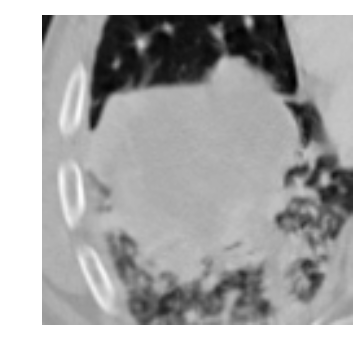

In [48]:
plt.imshow(normArr[4,:,:,:].reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');